Importing libraries


In [11]:
import sympy as sp
from sympy import *
from sympy.physics.mechanics import dynamicsymbols
import matplotlib.pyplot as plt
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)



Declaring variables

In [12]:
theta1, theta2,theta3, d1, d2,d3,a0,a1,a2 , alpha0,alpha1,alpha2, a0,a1,a2, d = dynamicsymbols('theta1:4  d1:4 a0:3 alpha0:3 a0:3 d')
DH_table=sp.Matrix([[alpha0,alpha1,alpha2],   [a0,a1,a2],  [theta1,theta2,theta3],    [ d1,d2,d3] ] )
DH_table=DH_table.transpose()
#(DH_table)

Finding DH Parameters table

In [13]:
def DH_parameter_table_fn():
    values= {alpha0:0,alpha1:0,alpha2:0,    a0:0,   theta3:0,   d1:0,d2:0,d3:0  }
    DH_table_withvalue=DH_table.subs(values)
    return (DH_table_withvalue)

Non-standard Transformation matrix definition

In [14]:

theta_i,theta_i_1, a_i_1, d_i=dynamicsymbols("theta_i theta_i-1 a_i-1 d_i")
alpha_i,alpha_i_1=dynamicsymbols("alpha_i alpha_i-1")
#pprint(thetai+thetaj+a_i_1)
transformation_matrix=sp.Matrix([[sp.cos(theta_i), -sp.sin(theta_i), 0, a_i_1],
                                    [sp.cos(alpha_i_1)*sp.sin(theta_i),sp.cos(theta_i)*cos(alpha_i_1),-sp.sin(alpha_i_1),-d_i*sp.sin(alpha_i_1)],
                                    [sp.sin(theta_i)*sp.sin(alpha_i_1), sp.cos(theta_i)*sp.sin(alpha_i_1),sp.cos(alpha_i_1),d_i*sp.cos(alpha_i_1)],
                                    [0,0,0,1]   
                                    ])


Finding the transformation matrices and the final transformation matrix

In [15]:


l1,l2=sp.symbols("l1:3")

transform_0_1_values={theta_i:theta1 , alpha_i_1:0, a_i_1:0, d_i:0}
transform_0_1=transformation_matrix.subs(transform_0_1_values)
#pprint(transform_0_1)

transform_1_2_values={theta_i:theta2 , alpha_i_1:0, a_i_1:l1, d_i:0}
transform_1_2=transformation_matrix.subs(transform_1_2_values)
#pprint(transform_1_2)

transform_2_3_values={theta_i:0 , alpha_i_1:0, a_i_1:l2, d_i:0}
transform_2_3=transformation_matrix.subs(transform_2_3_values)
#pprint(transform_2_3)
    
transform_0_2=transform_0_1*transform_1_2
transform_0_2.simplify()
#transform_0_2

transform_0_3=transform_0_1*transform_1_2*transform_2_3
transform_0_3.simplify()
    


Forward Kinematics

In [16]:
def forward_kinematics():
    import math
    t_1=float(input("Enter theta1: "))
    t_2=float(input("Enter theta2: "))
    l_1=float(input("Enter l1: "))
    l_2=float(input("Enter l2: "))
    t_1=t_1*(sp.pi/180.0)
    t_2=t_2*(sp.pi/180.0)

    user_input_values={theta1:t_1, theta2:t_2, l1:l_1, l2:l_2}

    Output_t_0_2=transform_0_2.subs(user_input_values)
    x_mid,y_mid=Output_t_0_2[0,3],Output_t_0_2[1,3]

    Output_transform=transform_0_3.subs(user_input_values)
    Output_transform.simplify()
    print("Transformation matrix: \n")
    pprint(Output_transform)
    print("\nEnd-effector position: ",(Output_transform[0,3].simplify(),Output_transform[1,3]))
    x_end=Output_transform[0,3]
    y_end=Output_transform[1,3]
    return create_frame(x_mid,y_mid,x_end,y_end,l_1,l_2)


Plotting the manipulator for given values

In [17]:
def create_frame(x_mid,y_mid,x_end,y_end,l_1,l_2,legend=0):
        x = [0,x_mid, x_end]
        y = [0,y_mid, y_end]
        #plt.figure(figsize=(6, 6))
        plt.axhline(0, color='b')
        plt.axvline(0, color='b')
        plt.plot(x, y, 'black',label="Links")
        plt.plot(x_end,y_end,'go',label='End effector position')
        plt.plot(x_mid,y_mid,'ro')
        plt.plot(0,0,'ro',label='Positions of joints')
        if(legend==0):
                plt.legend(loc='lower right')
        # 'bo' stands for blue circle marker
        plt.xlim(-(l_1+l_2+10), l_1+l_2+10)
        plt.ylim(-(l_1+l_2+10), l_1+l_2+10)
        #plt.savefig(f'./img/img_{t}.png', transparent = False,  facecolor = 'white')


Inverse kinematics

In [18]:
def inverse_kinematics():
    x1_end=float(input("Enter x-component of end-effector: "))
    y1_end=float(input("Enter y-component of end-effector: "))
    l_1=float(input("Enter l1: "))
    l_2=float(input("Enter l2: "))

    thet_2 = acos((x1_end**2+y1_end**2-l1**2-l2**2)/(2*l1*l2))
    thet_1=atan(sp.Integer(y1_end)/x1_end)-atan((l2*sp.sin(thet_2))/(l1+l2*sp.cos(thet_2)))
    inverse_values={theta1:thet_1, theta2:thet_2, l1:l_1, l2:l_2}
    x1_mid=transform_0_2[0,3]
    x1_mid=x1_mid.subs(inverse_values)
    y1_mid=transform_0_2[1,3]
    y1_mid=y1_mid.subs(inverse_values)


    return create_frame(x1_mid,y1_mid,x1_end,y1_end,l_1,l_2)








Workspace


In [19]:
def workspace():
    import time
    legendpass=0
    len1=float(input("Enter the first link length: "))
    len2=float(input("Enter the second link length: "))
    for t1 in range(-90,91,90):
        for t2 in range(-90,91,30):
            t1=t1*(sp.pi/180.0)
            t2=t2*(sp.pi/180.0)

            
            uservalues={theta1:t1, theta2:t2, l1:len1, l2:len2}
            
            x_mid_ws,y_mid_ws=transform_0_2[0,3].subs(uservalues),transform_0_2[1,3].subs(uservalues)
            x_end_ws=transform_0_3[0,3].subs(uservalues)
            y_end_ws=transform_0_3[1,3].subs(uservalues)
            
            create_frame(x_mid_ws,y_mid_ws,x_end_ws,y_end_ws,len1,len2,legendpass)
            legendpass+=1
    
        
        


Calling function

Transformation matrix: 

⎡cos(0.366666666666667⋅π)  -sin(0.366666666666667⋅π)  0  6.0⋅cos(0.36666666666
⎢                                                                             
⎢sin(0.366666666666667⋅π)  cos(0.366666666666667⋅π)   0  5.0⋅sin(0.17777777777
⎢                                                                             
⎢           0                          0              1                       
⎢                                                                             
⎣           0                          0              0                       

6667⋅π) + 5.0⋅cos(0.177777777777778⋅π)⎤
                                      ⎥
7778⋅π) + 6.0⋅sin(0.366666666666667⋅π)⎥
                                      ⎥
        0                             ⎥
                                      ⎥
        1                             ⎦

End-effector position:  (6.0*cos(0.366666666666667*pi) + 5.0*cos(0.177777777777778*pi), 5.0*sin(0.177777777777778*pi) + 6.0*sin(0.3666666666

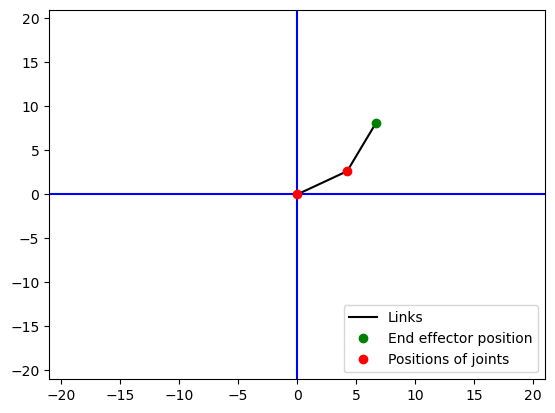

In [20]:
choice=int(input("1-Forward kinematics\n2-Inverse kinematics\n3-Workspace "))
if(choice==1):
    forward_kinematics()
elif(choice==2):
    inverse_kinematics()
elif(choice==3):
    workspace()

